In [15]:
%pylab inline
import libsgfdata
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [16]:
data = libsgfdata.SGFData("../multi.sgf")
data

Geotechnical data
Soundings: 3
     x_coordinate  y_coordinate
min         0.000         0.000
max     99592.836   1210182.118
            depth
count  514.000000
mean     3.887811
std      1.801525
min      0.025000
25%      2.542500
50%      3.967500
75%      5.395000
max      7.040000
       feed_thrust_force
count              253.0
mean                 0.0
std                  0.0
min                  0.0
25%                  0.0
50%                  0.0
75%                  0.0
max                  0.0

In [17]:
data.main

,lopnummer_huvud,lopnummer_sondering,anvand_programvara,datum_for_undersokning,grundvattenniva,HP,work_or_project_number,investigation_point,method_code,serial_number_measurement_probe,...,inverteringsfaktor_konduktivitet,method_code_orig,day,month,year,date,stop_code,stop_code_orig,depth_increment,depth_bedrock
0,1.0,1.0,CPTLOG-2.00,2014-09-19,-2.0,-2.0,1124.0,1001,cpt,3899.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,total,NaN,...,NaN,25.0,17.0,2.0,2017.0,2017-02-17,stop_against_presumed_rock,94.0,0.025,None


In [18]:
data.data.head()

,depth,cone_tip_resistance_uncorr,friction_uncorr,measured_pore_pressure,inclination,penetration_rate,feed_thrust_force,time_of_measurement,allocated_value_during_performance_of_sounding,zero_value_tip_pressure,...,zero_value_pore_pressure,comments,investigation_point,feed_trust_force,interval,pumping_rate,extra_spin,flushing,pumping,ramming
0,2.00,0.000,0.0,0.0,0.0,0.0,0.0,1064468.0,tilt_derivative_alarm,7.7423,...,389.3,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.02,3.617,48.0,14.0,2.6,20.0,0.0,1070468.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.04,3.793,60.0,17.0,2.8,18.0,0.0,1071593.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.06,2.424,101.0,34.0,2.8,1.0,0.0,1078406.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.08,2.639,103.0,36.0,2.8,22.0,0.0,1079156.0,nan,NaN,...,NaN,no_comment,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.id_col

'investigation_point'

Text(0, 0.5, 'Depth (m)')

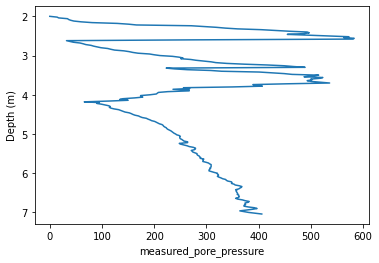

In [35]:
borehole = data.data[data.data.investigation_point == 1001]
plt.plot(borehole.measured_pore_pressure, borehole.depth)
plt.ylim((plt.ylim()[1], plt.ylim()[0]))
plt.xlabel("measured_pore_pressure")
plt.ylabel("Depth (m)")

In [20]:
data.normalize()

Geotechnical data
Soundings: 3
     x_coordinate  y_coordinate
min         0.000         0.000
max     99592.836   1210182.118
            depth
count  514.000000
mean     3.887811
std      1.801525
min      0.025000
25%      2.542500
50%      3.967500
75%      5.395000
max      7.040000
       feed_thrust_force
count              253.0
mean                 0.0
std                  0.0
min                  0.0
25%                  0.0
50%                  0.0
75%                  0.0
max                  0.0

In [21]:
data.dump("../test.sgf")